# Project: Analysis of TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, revenue, cast, runtime and more.
>
> The main objective is to analyse the given dataset and get a better understanding on how things are dependent on each other for better functioning of movies. To get a better grasp on things we propose a few questions and find the relevant answers for it.

In [1]:
#Importing necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Let's take a look at the data we are analysin and its various properties. We will sort out the necessary data according to its relevance and drop off the unrequired data.

### General Properties

In [2]:
# Loading the required dataset and perform operations to inspect the data
df_TMDB = pd.read_csv('tmdb-movies.csv')
df_TMDB.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Getting a better idea of the data and its type.
df_TMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### * Observations

* Columns like id, imdb_id, homepage, tagline, overview, keywords, vote_count , budget_adj & revenue_adj an be deleted as they will not be used for analysis.
* We Will be dropping off duplicated data as it will affect analysis negatively.
* We will also drop off null data as missing values will cause issues in analysis.
* The release_date column present in the data is in string format, we will convert it to DateTime format for better processing and create a seperate column of Movie release month.

In [4]:
#Dropping unrequired columns.
drp=['id','imdb_id','homepage','tagline','overview','keywords','vote_count','budget_adj','revenue_adj']
df_TMDB.drop(columns=drp,  inplace=True)

In [5]:
#Dropping Duplicate values.
df_TMDB.duplicated()
df_TMDB.drop_duplicates(inplace=True)

In [6]:
#Dropping null values and checking the info of our data.
df_TMDB.dropna(inplace=True)
df_TMDB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   budget                9772 non-null   int64  
 2   revenue               9772 non-null   int64  
 3   original_title        9772 non-null   object 
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   runtime               9772 non-null   int64  
 7   genres                9772 non-null   object 
 8   production_companies  9772 non-null   object 
 9   release_date          9772 non-null   object 
 10  vote_average          9772 non-null   float64
 11  release_year          9772 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 992.5+ KB


In [7]:
#Converting the date from string to DateTime format.
df_TMDB['release_date'] = pd.to_datetime(df_TMDB['release_date'])
df_TMDB['release_month'] = pd.DatetimeIndex(df_TMDB['release_date']).month
df_TMDB['release_month'] = df_TMDB['release_month'].apply(lambda x: calendar.month_abbr[x])

In [8]:
#df_TMDB['release_date'] = df_TMDB['release_date'].dt.strftime('%m-%d')

In [9]:
#Reviewing the data to ensure all the changes.
df_TMDB.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,release_month
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,Jun
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,May
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,Mar
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,Dec
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,Apr


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Profit earned by Movies 

In [10]:
#Calculating profit made my movies and creating a new column
df_TMDB['profit'] = df_TMDB['revenue'] - df_TMDB['budget']

In [11]:
#Calculating max profit made by a movie
max_profit = df_TMDB['profit'].max()
max_profit = df_TMDB[df_TMDB['profit'] == max_profit]
max_profit

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,release_month,profit
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,7.1,2009,Dec,2544505847


In [12]:
#Calculating min profit made by a movie
min_profit = df_TMDB['profit'].min()
min_profit = df_TMDB[df_TMDB['profit'] == min_profit]
min_profit

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,release_month,profit
2244,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,6.4,2010,Dec,-413912431


### Research Question 2: Some minute observations

* Visualising profits made by movies through time can give us an idea of how much the movie industry has grown and how they have become a part of peoples lives and also helps to predict the flow of things.

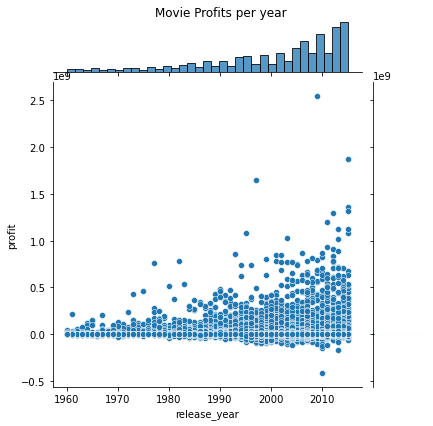

In [13]:
#Visualising
n = sns.jointplot(y='profit',x='release_year',data=df_TMDB)
n.fig.suptitle("Movie Profits per year")
n.fig.subplots_adjust(top=0.95)

* The comparison between profits and their release month give us an idea how movies fare when released during different time of the year.

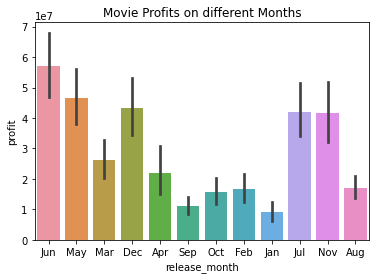

In [14]:
#Visualising
sns.barplot(y='profit',x='release_month',data=df_TMDB).set(title=("Movie Profits on different Months"));

* Comparing runtime and popularity help us to understand the prefered runtime of movies by people which relatively perform better.

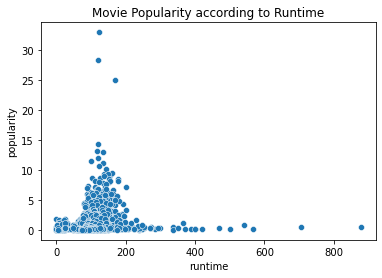

In [15]:
#Visualising
sns.scatterplot(x='runtime',y='popularity',data=df_TMDB).set(title='Movie Popularity according to Runtime');

* Comparing runtime and average rating received by people to understand the audiences liking of how long the duration of movies should be.

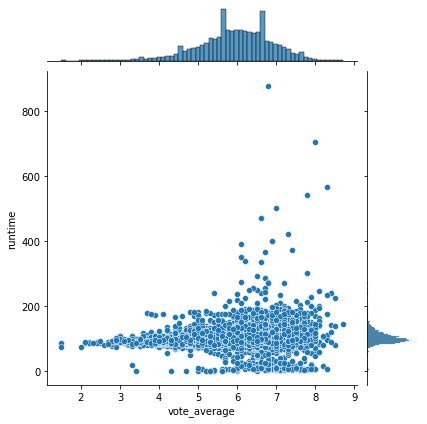

In [16]:
#Visualizing
sns.jointplot(y='runtime',x='vote_average',data=df_TMDB)


### Research Question 3: Movie Releases in Different Genres

In [17]:
#Splitting the Genre column for better understanding
df_TMDB['T_Genres'] = df_TMDB['genres'].apply(lambda x: x.split(sep='|'))

In [18]:
#Sorting genres and giving a value count on genres
TMDB_Genres = df_TMDB['genres'].str.cat(sep = '|')
data = pd.Series(TMDB_Genres.split('|'))
Total_Genres = data.value_counts()
Total_Genres

Drama              4364
Comedy             3433
Thriller           2746
Action             2235
Romance            1570
Horror             1526
Adventure          1384
Crime              1299
Science Fiction    1136
Family             1095
Fantasy             840
Mystery             773
Animation           617
Music               339
Documentary         317
History             306
War                 258
Western             160
TV Movie            132
Foreign             120
dtype: int64

* The bar graph of movies made in different genres will give us an idea of how much they are favoured by the audience. 

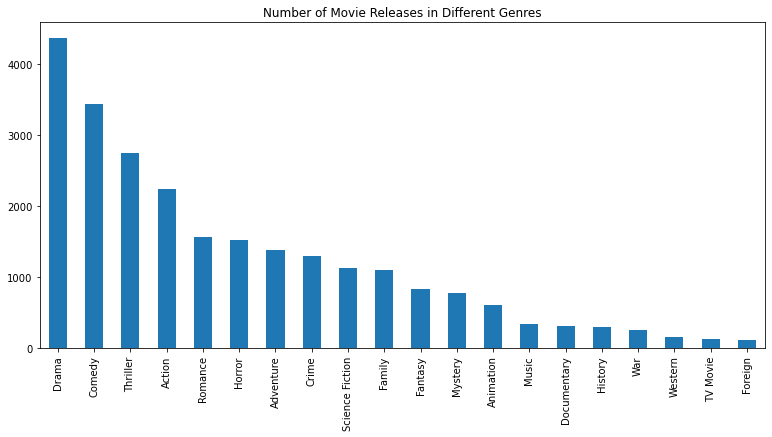

In [19]:
#Visualising
Total_Genres.plot(kind='bar', figsize= (13,6), title='Number of Movie Releases in Different Genres');

### Research Question 4: Popularity of Different Genres


In [20]:
#Get the rows where genre consists of a pipe (|). Then seperate each genre and duplicate rows with each genre tag
sepg = df_TMDB['genres'].str.split('|').apply(pd.Series, 1).stack()
sepg.index = sepg.index.droplevel(-1) # to line up with df's index
sepg.name = 'genres' # needs a name to join
del df_TMDB['genres']
df_TMDB = df_TMDB.join(sepg)

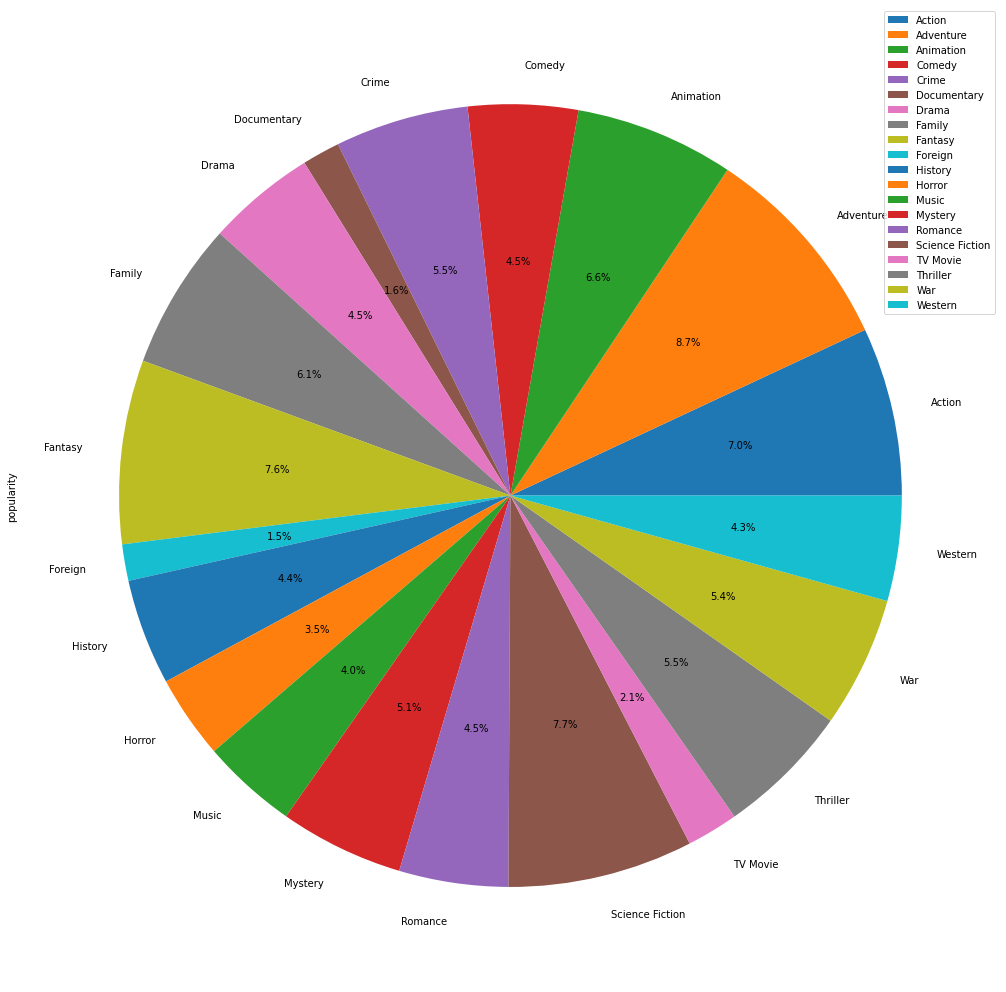

In [21]:
#Plotting Genres in a pie chart to find out popularity of different genres.
popular_genres = pd.DataFrame(df_TMDB.groupby('genres')['popularity'].mean())
popular_genres.plot(kind='pie',subplots=True, autopct='%1.1f%%', figsize=(18,18));

## Limitations

* The data provided could have included critic ratings for all the movies as it would have been  a professional analysis of how the movie fared.
* The difference between critic ratings and audience ratings could have given us a better insight of the difference between these two.
* The total time required for the production of the movie can also help us to understand the budget and revenue made by movies and was it worth it.

<a id='conclusions'></a>
## Conclusions

After analysing the data on The Movie Database, we have a better understanding of how things work and have a conclusion based on the observations made.

#### Q1.Max and Min Profits made by movies.

   * Maximum Profits made by a movie: **Avatar  \\$2544505847 USD**.
   
   * Minimum Profits made by a movie: **The Warrior's Way -\\$413912431 USD**.

#### Q2. Observations related to movies.

   * The profit made by movies have **increased** on a large scale from 1960 to 2015 which may be due to a better exposure, better marketting and many advancements in the movie sector.
   * Profit made by movies released between **May-July** and **Nov-Dec** make far better profits than any other where **June is the highest**.
   * Movies with runtime between the range of **90-180** are far **more popular** than movies with high or lower runtime.
   * Movies with a **runtime of 150-160** received an average **rating of 6** from the audience.

#### Q3. Movie Releases in Different Genres
   
   * A total of **20 Genres** of movies were present in the data between 1960-2015.
   * **DRAMA** has the maximum releases throught the timeline of 1960-2015 a total of **4364**.
   * **Foriegn** being the lowest releases with **120**.

#### Q4. Popularity of Different Genres

   * **Adventure** was the **most popular genre**.
   * **foriegn** was the **least popular genre**.